<a href="https://colab.research.google.com/github/pepesrz91/machine-learning-2021-mcc/blob/master/ProjectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

figure(figsize=(1, 1), dpi=80)

<Figure size 80x80 with 0 Axes>

<Figure size 80x80 with 0 Axes>

Parte 1. Análisis numérico y gráfico de los datos. 

# Información sobre los datos

Los datos a utilizar se encuentran en: 
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients  



In [162]:
data = pd.read_csv("/content/drive/MyDrive/Presentaciones/default_cards.csv")

In [163]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Eliminal la columna ID ya que está solo puede meter ruido en nuestro modelo y no tiene importancia.

In [164]:
data = data.drop("ID", 1)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f973f0be4d0>,
      dtype=object)

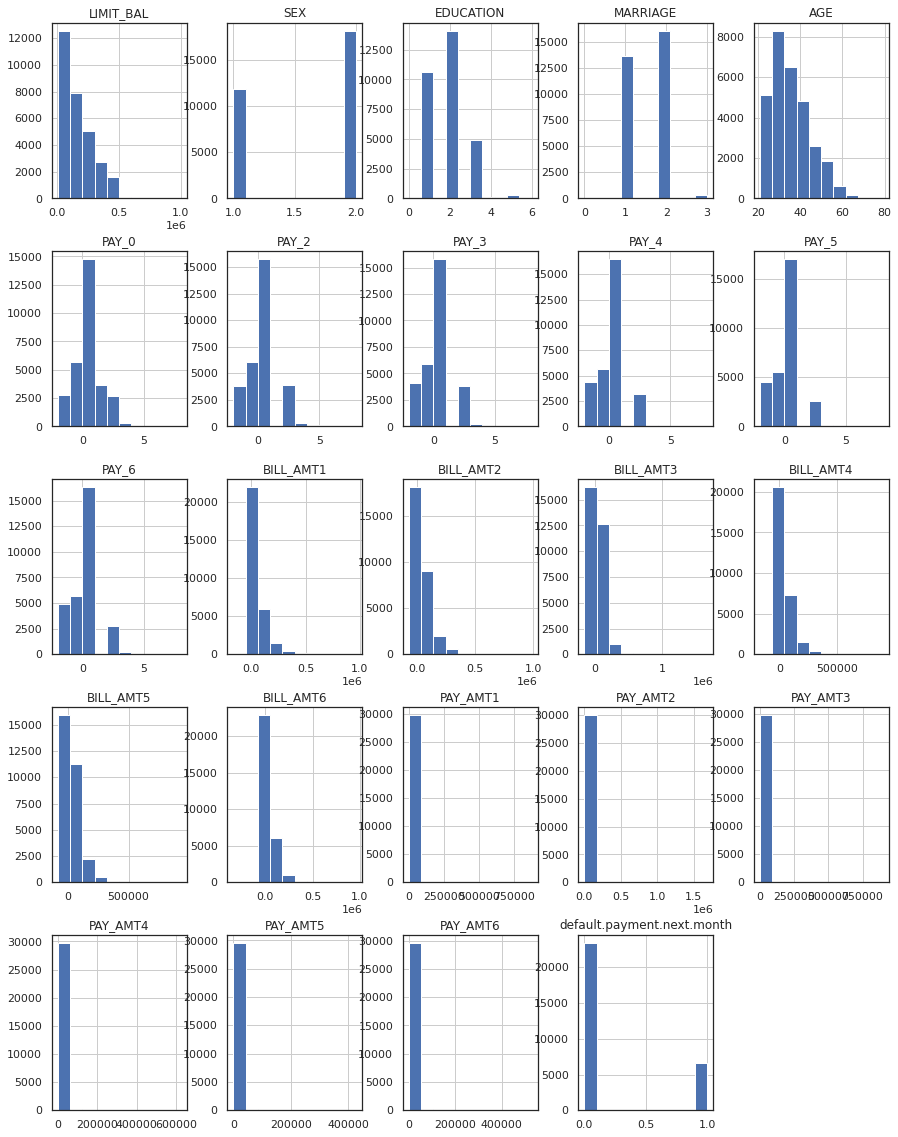

In [166]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax=ax)

## 1. Obtener un resumen numérico descriptivo de todas las variables del archivo. ¿Qué tipo de 
variables se tienen: numéricas, categóricas?  

Nuestras variables categóricas son: 


1.   SEX
2.   EDUCATION
3.   MARRIAGE
4.   PAYS



### Cercioramos que el valor 0 en los datos PAY_N... está en 21, 173 datos, lo que nos indica que es un dato relevante el cuál significa que un usuario pago en tiempo. 

In [167]:
len(data[(data['PAY_0'] == 0) | (data['PAY_2'] == 0) | (data['PAY_3'] == 0) | ( data['PAY_4'] == 0)  | (data['PAY_5'] == 0)  | ( data['PAY_6'] == 0 )])

21173

In [168]:
len(data[(data['EDUCATION'] == 0) | (data['EDUCATION'] == 5) | (data['EDUCATION']== 6) | (data['MARRIAGE'] == 0) ])

399

### 2. ¿Existen datos perdidos? Indica las decisiones que tomarás con base a los datos perdidos. 

Si tenemos 399 datos perdidos en EDUCATION y MARRIAGE. Los ceros son datos que no conocemos. Por la cantidad tan pequeña de datos, podemos eliminar los mismos y no tendrá un impacto negativo en nuestros modelos. 

In [169]:
data.dtypes

LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [170]:
data.rename({'PAY_0':'PAY_1','default.payment.next.month':'DEFAULT'},axis = 1,inplace = True)

In [171]:
data.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

### 3. Verifica la descripción dada de cada variable en el artículo citado y compáralo con tus resultados. 
¿Obervas algunas discrepancias en algunos niveles de las variables? ¿A qué atribuyes dicha 
dscrepancia? ¿Cómo enfrentarás dicha discrepancia? ¿Los autores del artículo mecionan algo a 
respecto?  

Si la cantidad de datos en el artículo mencionado es de 25,000 y en nuestros datos por el momento tenemos alrededor de 29,600. Probablemente los autores del artículo quitaron outliers de alguna de las variables y por ende se redujo su número de datos. 



### 4. Verifica las frecuencias de cada nivel de las variables categóricas. ¿Qué decisiones podrías tomar 




2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
------------------------------


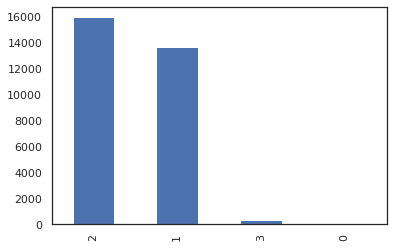

In [172]:
print(data["MARRIAGE"].value_counts())
print("------------------------------")
data['MARRIAGE'].value_counts().plot(kind='bar')

In [173]:
data["MARRIAGE"].value_counts()


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
------------------------------


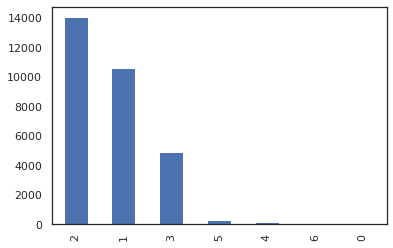

In [174]:
print(data['EDUCATION'].value_counts())
print("------------------------------")
data['EDUCATION'].value_counts().plot(kind='bar')

2    18112
1    11888
Name: SEX, dtype: int64
------------------------------


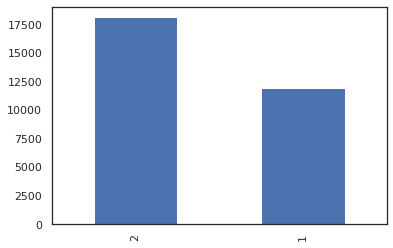

In [175]:
print(data['SEX'].value_counts())
print("------------------------------")
data['SEX'].value_counts().plot(kind='bar')

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
------------------------------


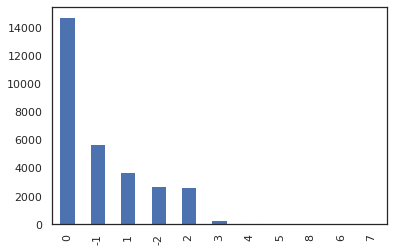

In [176]:
print(data['PAY_1'].value_counts())
print("------------------------------")
data['PAY_1'].value_counts().plot(kind='bar')

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
------------------------------


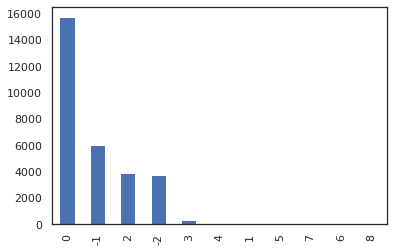

In [177]:
print(data['PAY_2'].value_counts())
print("------------------------------")
data['PAY_2'].value_counts().plot(kind='bar')

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
------------------------------


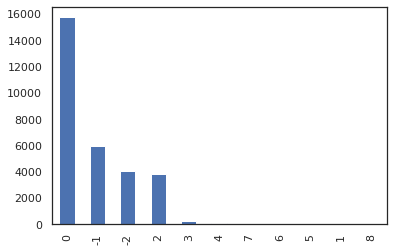

In [178]:
print(data['PAY_3'].value_counts())
print("------------------------------")
data['PAY_3'].value_counts().plot(kind='bar')

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
------------------------------


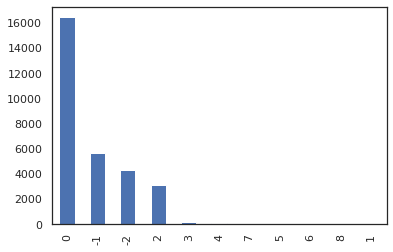

In [179]:
print(data['PAY_4'].value_counts())
print("------------------------------")
data['PAY_4'].value_counts().plot(kind='bar')

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
------------------------------


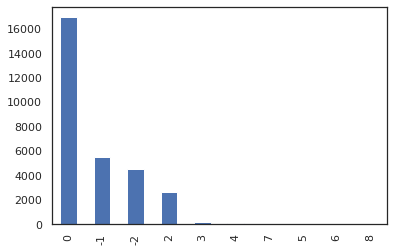

In [180]:
print(data['PAY_5'].value_counts())
print("------------------------------")
data['PAY_5'].value_counts().plot(kind='bar')

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64
------------------------------


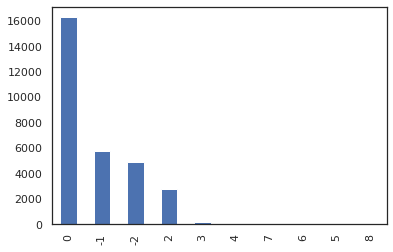

In [181]:
print(data['PAY_6'].value_counts())
print("------------------------------")
data['PAY_6'].value_counts().plot(kind='bar')

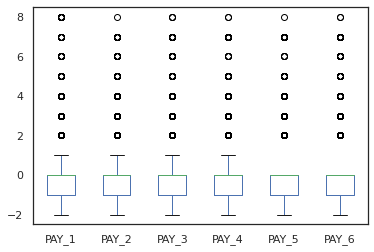

In [182]:
data[['PAY_1',  'PAY_2', 'PAY_3', 'PAY_4','PAY_5', 'PAY_6']].plot.box()

In [183]:
X = data.drop(['DEFAULT'],axis = 1).copy()
y = data['DEFAULT'].copy()

In [160]:
X_encoded = pd.get_dummies(X,columns = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_-2,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-2,PAY_2_-1,...,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


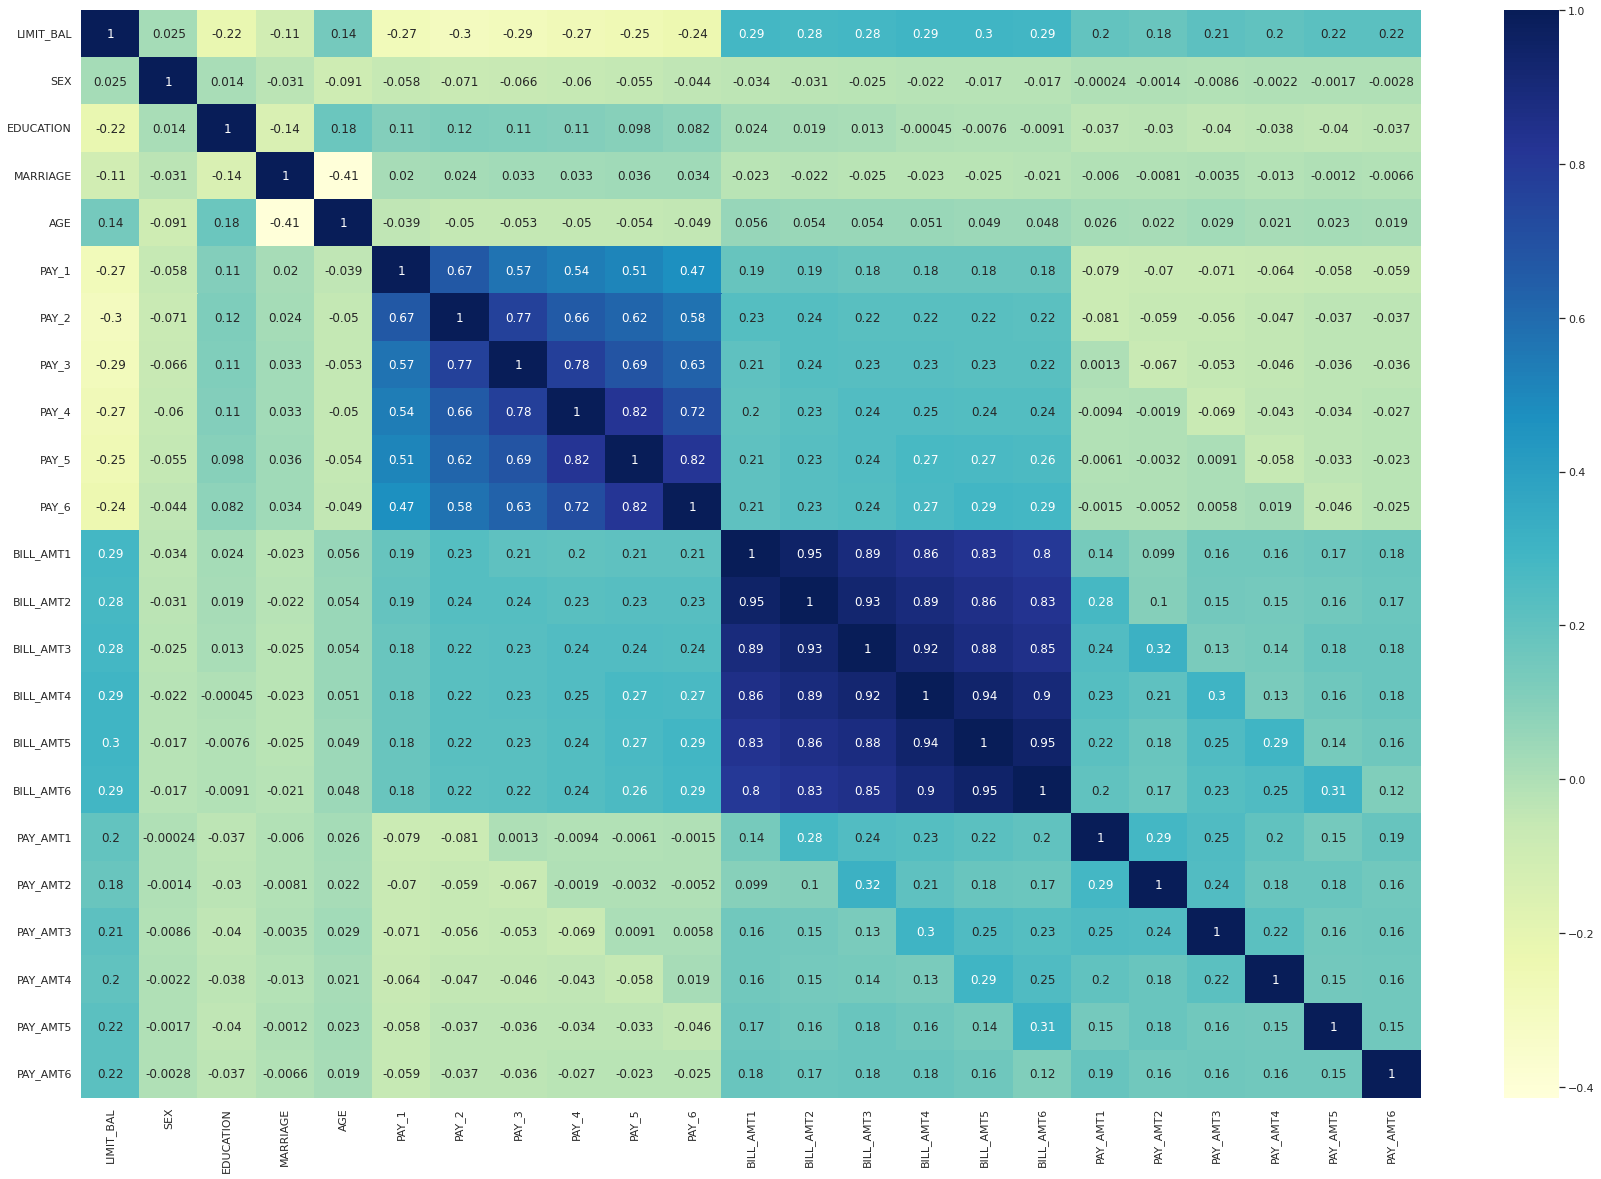

In [184]:
sns.set_theme(style="white")
corr = X.corr()
# Draw the heatmap with the mask and correct aspect ratio
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.subplots(figsize=(30,20))

sns.heatmap(corr, cmap="YlGnBu", annot=True)